<a href="https://colab.research.google.com/github/conpop9/Stonks/blob/main/Apple_Stonks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import dependencies

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 46kB/s 
     |████████████████████████████████| 412.3MB 45kB/s 
     |████████████████████████████████| 245kB 52.2MB/s 
     |████████████████████████████████| 174kB 71.0MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 512kB 64.6MB/s 
     |████████████████████████████████| 3.8MB 37.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=001a3573850839274b558799a6741e6165f32301303ef7d29ee964874b5e2109
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
 

In [28]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [30]:
df = pd.read_csv('aaple2.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume
0,05/20/2021,125.23,127.72,125.10,127.31,"76,857,117"
1,05/19/2021,123.16,124.92,122.86,124.69,"92,611,992"
2,05/18/2021,126.56,126.99,124.78,124.85,"63,342,930"
3,05/17/2021,126.82,126.93,125.17,126.27,"74,116,555"
4,05/14/2021,126.25,127.89,125.85,127.45,"81,917,953"


In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [32]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,120.40,121.17,119.16,121.03,"88,105,047"
2021-03-11,122.54,123.21,121.26,121.96,"103,026,492"
2021-03-10,121.69,122.17,119.45,119.98,"111,943,297"
2021-03-09,119.03,122.06,118.79,121.09,"129,525,797"
2021-03-08,120.93,121.00,116.21,116.36,"154,376,609"


In [33]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [34]:
env.signal_features

array([[ 1.2103e+02,  0.0000e+00],
       [ 1.2196e+02,  9.3000e-01],
       [ 1.1998e+02, -1.9800e+00],
       [ 1.2109e+02,  1.1100e+00],
       [ 1.1636e+02, -4.7300e+00],
       [ 1.2142e+02,  5.0600e+00],
       [ 1.2013e+02, -1.2900e+00],
       [ 1.2206e+02,  1.9300e+00],
       [ 1.2512e+02,  3.0600e+00],
       [ 1.2779e+02,  2.6700e+00],
       [ 1.2126e+02, -6.5300e+00],
       [ 1.2099e+02, -2.7000e-01],
       [ 1.2535e+02,  4.3600e+00],
       [ 1.2586e+02,  5.1000e-01],
       [ 1.2600e+02,  1.4000e-01],
       [ 1.2987e+02,  3.8700e+00],
       [ 1.2971e+02, -1.6000e-01],
       [ 1.3084e+02,  1.1300e+00],
       [ 1.3319e+02,  2.3500e+00],
       [ 1.3537e+02,  2.1800e+00],
       [ 1.3513e+02, -2.4000e-01],
       [ 1.3539e+02,  2.6000e-01],
       [ 1.3601e+02,  6.2000e-01],
       [ 1.3691e+02,  9.0000e-01],
       [ 1.3676e+02, -1.5000e-01],
       [ 1.3739e+02,  6.3000e-01],
       [ 1.3394e+02, -3.4500e+00],
       [ 1.3499e+02,  1.0500e+00],
       [ 1.3414e+02,

# 2. Build Environment

In [35]:
env.action_space

Discrete(2)

info {'total_reward': 11.090000000000032, 'total_profit': 0.7465728277706531, 'position': 0}


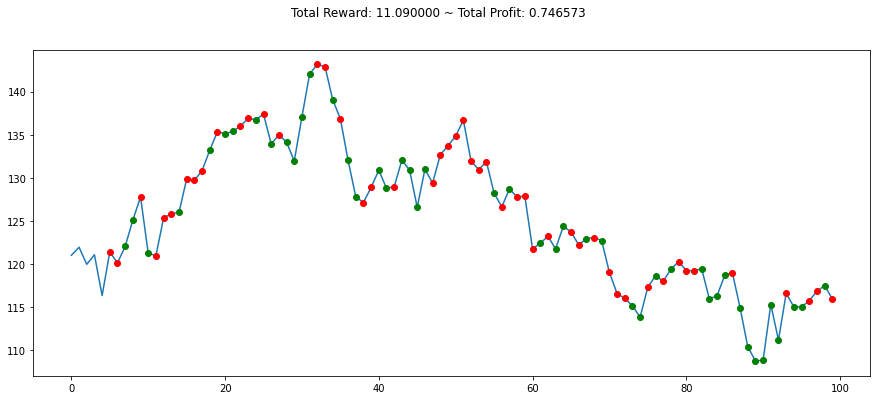

In [36]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [37]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [38]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
---------------------------------
| explained_variance | -0.00142 |
| fps                | 527      |
| nupdates           | 137600   |
| policy_entropy     | 0.632    |
| total_timesteps    | 688000   |
| value_loss         | 0.545    |
---------------------------------
---------------------------------
| explained_variance | -0.00588 |
| fps                | 527      |
| nupdates           | 137700   |
| policy_entropy     | 0.629    |
| total_timesteps    | 688500   |
| value_loss         | 7.51     |
---------------------------------
---------------------------------
| explained_variance | -0.581   |
| fps                | 527      |
| nupdates           | 137800   |
| policy_entropy     | 0.147    |
| total_timesteps    | 689000   |
| value_loss         | 0.000234 |
---------------------------------
---------------------------------
| explained_variance | -4.17    |
| fps                | 527      |
| nupdates           | 137900  

# 4. Evaluation

In [39]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 5.780000000000001, 'total_profit': 0.9542487618540115, 'position': 1}


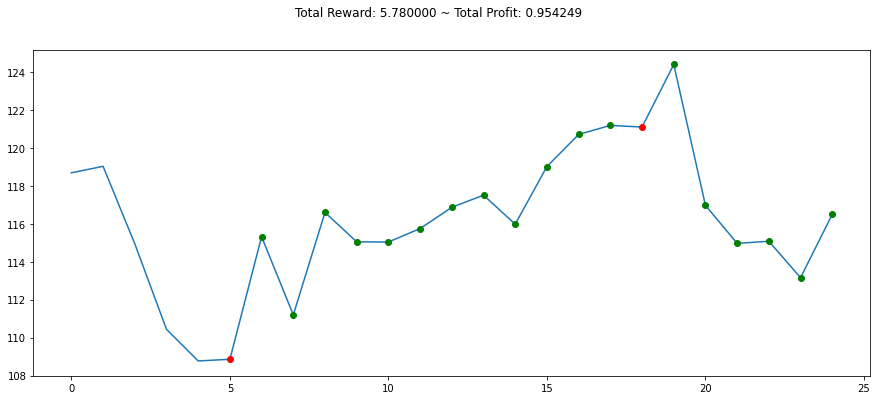

In [40]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()